In [92]:
import numpy as np
import re
import scipy

from collections import Counter

In [18]:
with open('./sentences.txt', 'r') as f:
    data = f.read().split('\n')[:-1]

In [60]:
def tokenize(text):
    splitted =  re.split('[^a-z]', text.lower())
    clear = []
    for word in splitted:
        if word != '':
            clear.append(word)
    return clear

In [61]:
tokenized_corpus = [tokenize(text) for text in data]

In [62]:
tokenized_corpus

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [63]:
words = {}
for sentence in tokenized_corpus:
    for word in sentence:
        if word not in words:
            words[word] = 1
        words[word] += 1

In [64]:
len(words)

254

In [65]:
for i, key in enumerate(words.keys()):
    words[key] = i

In [66]:
words

{'a': 33,
 'according': 167,
 'adjacent': 114,
 'allow': 185,
 'allows': 196,
 'also': 24,
 'an': 230,
 'ancestor': 77,
 'and': 58,
 'animals': 61,
 'any': 152,
 'app': 208,
 'apple': 168,
 'are': 78,
 'arguments': 153,
 'artificial': 66,
 'as': 14,
 'available': 164,
 'based': 200,
 'basic': 136,
 'be': 23,
 'between': 95,
 'binary': 27,
 'both': 79,
 'by': 56,
 'bytes': 20,
 'can': 22,
 'cat': 15,
 'catenates': 17,
 'cats': 4,
 'changes': 9,
 'chromosomes': 84,
 'clear': 130,
 'closest': 75,
 'command': 135,
 'commands': 125,
 'common': 34,
 'community': 193,
 'comparison': 1,
 'computers': 178,
 'concatenate': 26,
 'concern': 107,
 'connected': 127,
 'contains': 169,
 'content': 42,
 'count': 253,
 'create': 242,
 'default': 109,
 'delete': 119,
 'deliberately': 64,
 'developed': 194,
 'diploid': 80,
 'disk': 244,
 'displays': 155,
 'dogs': 3,
 'domestic': 87,
 'domesticated': 73,
 'domestication': 12,
 'download': 205,
 'drive': 248,
 'during': 10,
 'ears': 52,
 'editions': 166,
 '

In [116]:
matrix = np.full((len(tokenized_corpus), len(words)), 0)
for i, sentence in enumerate(tokenized_corpus):
    for j, word in enumerate(sentence):
        count_word = sentence.count(word)
        matrix[i][words[word]] = count_word

In [117]:
matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1]])

In [118]:
def cosine_distance(row1, row2):
    scalar = row1.dot(row2)
    distance = 1 - scalar / (np.linalg.norm(row1) * np.linalg.norm(row2))
    return distance

In [119]:
distances = []
for i, row1 in enumerate(matrix):
    for j, row2 in enumerate(matrix):
        distances.append((i, j, cosine_distance(row1, row2)))

In [120]:
answ = []
for i in distances:
    if i[0] == 0:
        answ.append(i)

In [125]:
answ

[(0, 0, 0.0),
 (0, 1, 0.9527544408738466),
 (0, 2, 0.8644738145642124),
 (0, 3, 0.8951715163278082),
 (0, 4, 0.7770887149698589),
 (0, 5, 0.9402385695332803),
 (0, 6, 0.7327387580875756),
 (0, 7, 0.9258750683338899),
 (0, 8, 0.884272487528431),
 (0, 9, 0.9055088817476932),
 (0, 10, 0.8328165362273942),
 (0, 11, 0.8804771390665607),
 (0, 12, 0.8396432548525454),
 (0, 13, 0.8703592552895671),
 (0, 14, 0.8740118423302576),
 (0, 15, 0.9442721787424647),
 (0, 16, 0.8406361854220809),
 (0, 17, 0.956644501523794),
 (0, 18, 0.9442721787424647),
 (0, 19, 0.8885443574849294),
 (0, 20, 0.8427572744917122),
 (0, 21, 0.8250364469440586)]

In [124]:
for i, j, k in sorted(answ, key=lambda x: x[2])[1:3]:
    print(j, k)

6 0.7327387580875756
4 0.7770887149698589


In [123]:
distances

[(0, 0, 0.0),
 (0, 1, 0.9527544408738466),
 (0, 2, 0.8644738145642124),
 (0, 3, 0.8951715163278082),
 (0, 4, 0.7770887149698589),
 (0, 5, 0.9402385695332803),
 (0, 6, 0.7327387580875756),
 (0, 7, 0.9258750683338899),
 (0, 8, 0.884272487528431),
 (0, 9, 0.9055088817476932),
 (0, 10, 0.8328165362273942),
 (0, 11, 0.8804771390665607),
 (0, 12, 0.8396432548525454),
 (0, 13, 0.8703592552895671),
 (0, 14, 0.8740118423302576),
 (0, 15, 0.9442721787424647),
 (0, 16, 0.8406361854220809),
 (0, 17, 0.956644501523794),
 (0, 18, 0.9442721787424647),
 (0, 19, 0.8885443574849294),
 (0, 20, 0.8427572744917122),
 (0, 21, 0.8250364469440586),
 (1, 0, 0.9527544408738466),
 (1, 1, 2.220446049250313e-16),
 (1, 2, 0.7908349933664811),
 (1, 3, 0.9306624754718463),
 (1, 4, 0.8156975548063786),
 (1, 5, 0.9604715292478953),
 (1, 6, 0.8939339828220179),
 (1, 7, 0.950970966215454),
 (1, 8, 0.7958758547680685),
 (1, 9, 0.71875),
 (1, 10, 0.8894185328838271),
 (1, 11, 0.841886116991581),
 (1, 12, 0.7525126265847084

In [126]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [128]:
f(15)

0.6352214195786656

In [145]:
A = np.array([[1, 1], [1, 15]])
b = np.array([[f(1)], [f(15)]])
w = np.linalg.solve(A, b)

In [146]:
w = np.linalg.solve(A, b)

In [147]:
import matplotlib.pyplot as plt

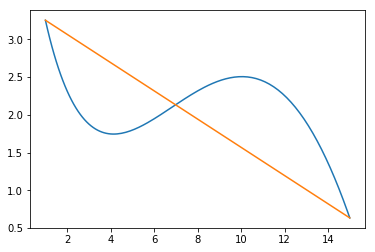

In [148]:
plt.plot(np.arange(1, 15.1, 0.1), f(np.arange(1, 15.1, 0.1)))
plt.plot(np.arange(1, 15.1, 0.1), w[0] + w[1] * np.arange(1, 15.1, 0.1))
plt.show()

In [156]:
A = np.array([[1, 1, 1], [1, 8, 8 ** 2], [1, 15, 15 ** 2]])
b = np.array([[f(1)], [f(8)], [f(15)]])
w = np.linalg.solve(A, b)

In [157]:
A

array([[  1,   1,   1],
       [  1,   8,  64],
       [  1,  15, 225]])

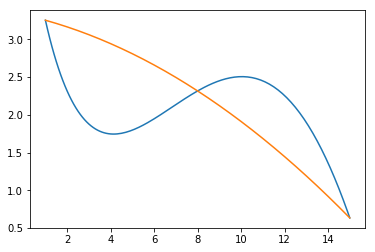

In [158]:
plt.plot(np.arange(1, 15.1, 0.1), f(np.arange(1, 15.1, 0.1)))
plt.plot(np.arange(1, 15.1, 0.1), w[0] + w[1] * np.arange(1, 15.1, 0.1) + w[2] * np.arange(1, 15.1, 0.1) ** 2)
plt.show()

In [160]:
A = np.array([[1, 1, 1, 1], [1, 4, 4 ** 2, 4 ** 3], [1, 10, 10 ** 2, 10 ** 3], [1, 15, 15 ** 2, 15 ** 3]])
b = np.array([[f(1)], [f(4)], [f(10)], [f(15)]])
w = np.linalg.solve(A, b)

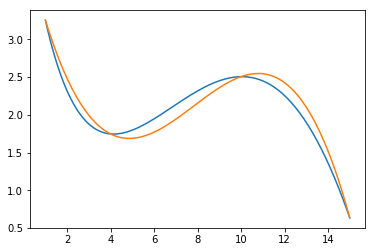

In [161]:
plt.plot(np.arange(1, 15.1, 0.1), f(np.arange(1, 15.1, 0.1)))
plt.plot(np.arange(1, 15.1, 0.1), w[0] + w[1] * np.arange(1, 15.1, 0.1) + w[2] * np.arange(1, 15.1, 0.1) ** 2 + w[3] * np.arange(1, 15.1, 0.1) ** 3)
plt.show()

In [163]:
np.linalg.inv(A).dot(b)

array([[ 4.36264154],
       [-1.29552587],
       [ 0.19333685],
       [-0.00823565]])